<a href="https://colab.research.google.com/github/trisskmasarahh/PCVK_Ganjil_2025/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*NAMA : TRI SUKMA SARAH*

*KELAS : 3B*

*KELAS : 2341720051*

Akses Drive

In [1]:
from google.colab import drive

drive.mount ('/content/drive')

Mounted at /content/drive


 Mengubah tingkat kecerahan citra 
-------------------------------
Masukkan nilai kecerahan: 50


/tmp/ipython-input-1706200208.py:19: RuntimeWarning: overflow encountered in scalar add
  brightness_image[y, x, c] = np.clip(original[y, x, c] +


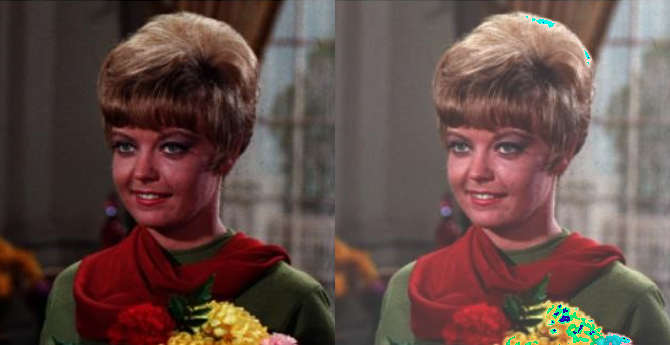

In [6]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print(' Mengubah tingkat kecerahan citra ')
print('-------------------------------')
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/girl.png')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y, x, c] = np.clip(original[y, x, c] +
                                                brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat([original, brightness_image])
cv2_imshow(final_frame)

# TUGAS PRAKTIKUM

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

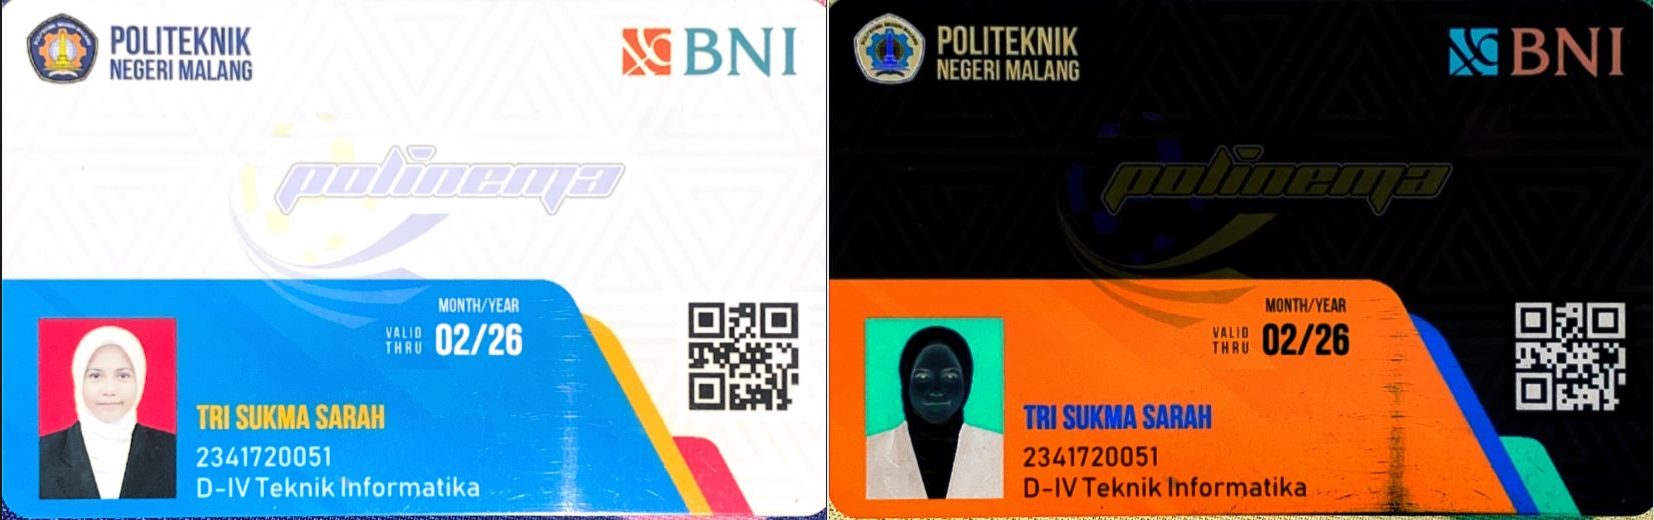

In [7]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# Membaca citra asli
original = cv.imread('/content/drive/MyDrive/PCVK/ktm.jpg')

# Inverse citra (negatif)
inverse_image = 255 - original

# Gabungkan citra asli dan hasil inverse untuk ditampilkan berdampingan
final_frame = cv.hconcat([original, inverse_image])

# Tampilkan hasil
cv2_imshow(final_frame)
cv.waitKey(0)
cv.destroyAllWindows()


2. implementasikan transformasi contrast pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga menghasilkan keluaran seperti berikut:

 Mengubah kontras dan tingkat kecerahan citra 
------------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


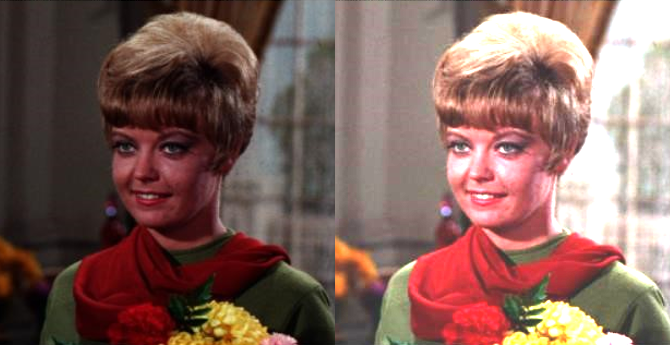

In [8]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print(" Mengubah kontras dan tingkat kecerahan citra ")
print("------------------------------------------------")

# Input kecerahan dan kontras
brightness = int(input("Masukkan tingkat kecerahan [-255 - 255]: "))
contrast = float(input("Masukkan kontras [1.0 - 3.0]: "))

# Membaca gambar
original = cv.imread('/content/drive/MyDrive/PCVK/girl.png')

# Transformasi kontras dan kecerahan
adjusted = cv.convertScaleAbs(original, alpha=contrast, beta=brightness)

# Gabungkan gambar asli dan hasil transformasi
final_frame = cv.hconcat([original, adjusted])

# Tampilkan hasil
cv2_imshow(final_frame)
cv.waitKey(0)
cv.destroyAllWindows()

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi log, sehingga menghasilkan keluaran seperti berikut:


Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------------------------------
Masukkan nilai kecerahan: 50


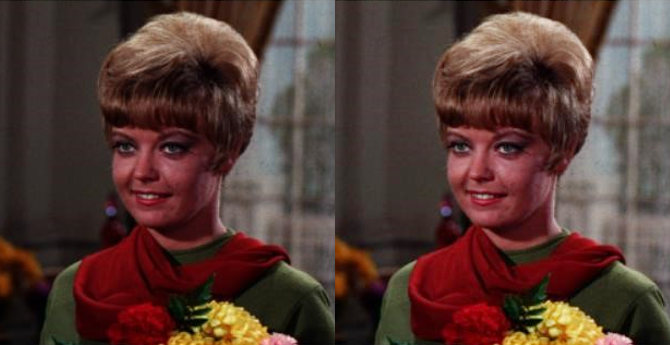

In [9]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print("Mengubah tingkat kecerahan citra dengan Transformasi Log")
print("--------------------------------------------------------")

# Input nilai kecerahan
brightness = int(input("Masukkan nilai kecerahan: "))

# Membaca gambar (tetap dalam format BGR)
original = cv.imread('/content/drive/MyDrive/PCVK/girl.png')

# Normalisasi nilai piksel ke [0,1]
normalized = original / 255.0

# Konstanta c (bisa diatur dengan brightness)
c = 1 + (brightness / 100)

# Transformasi log
log_image = c * np.log1p(normalized)

# Normalisasi ulang ke [0,255]
# Penting: Pastikan citra memiliki tipe data float sebelum normalisasi
log_image = 255 * (log_image / np.max(log_image))
log_image = np.uint8(log_image)

# Gabungkan hasil (tidak perlu konversi warna lagi)
final_frame = cv.hconcat([original, log_image])

# Tampilkan hasil
cv2_imshow(final_frame)
cv.waitKey(0)
cv.destroyAllWindows()

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

Implementasi transformasi grayscale dengan metode averaging, lightness, dan luminance
----------------------------------------------------------------------------------
Averaging Method:


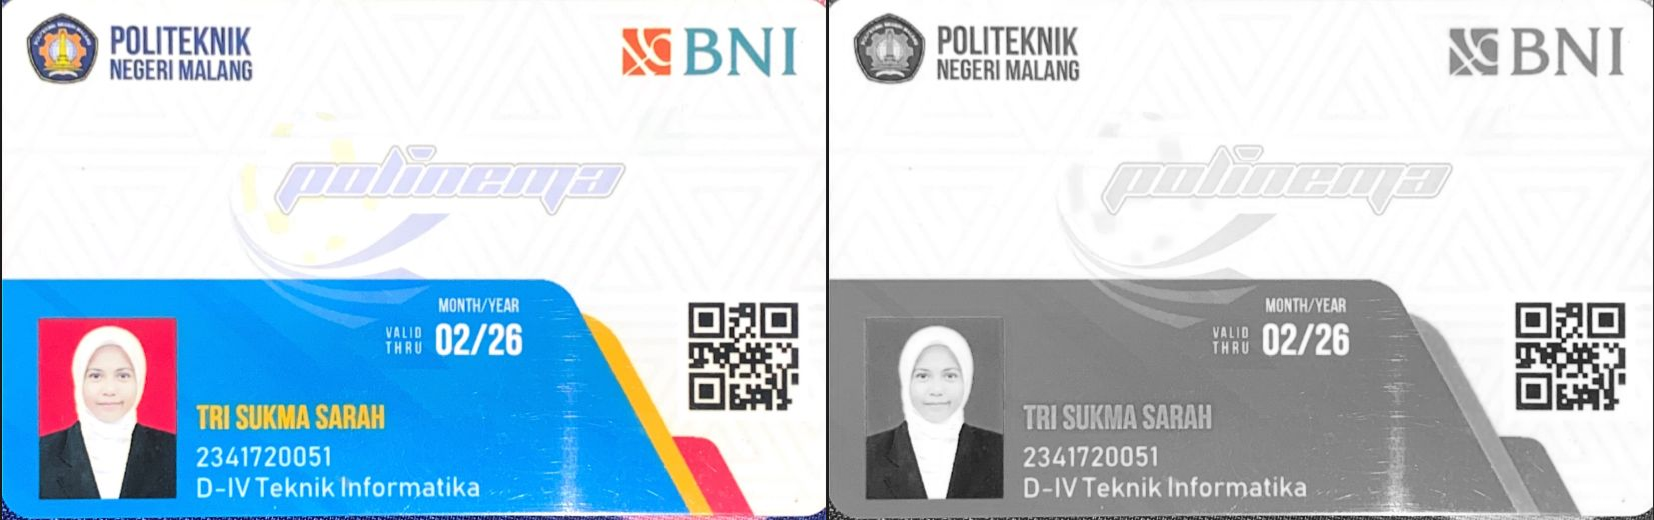


Lightness Method:


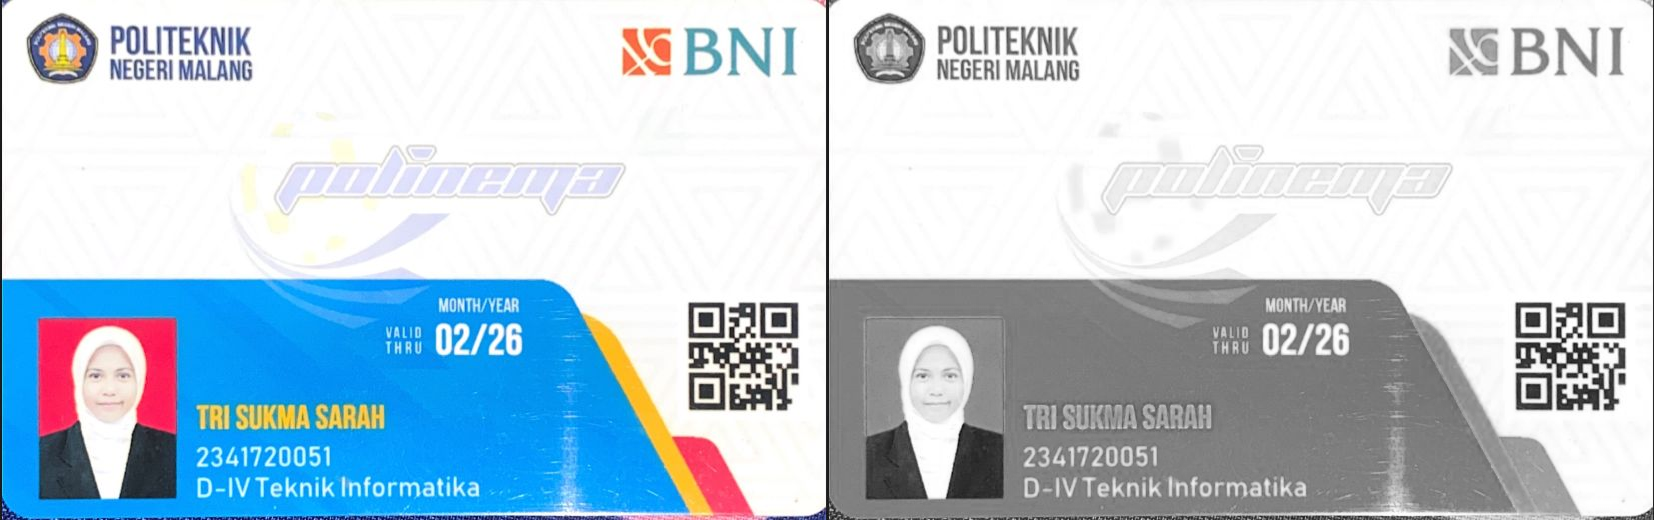


Luminance Method:


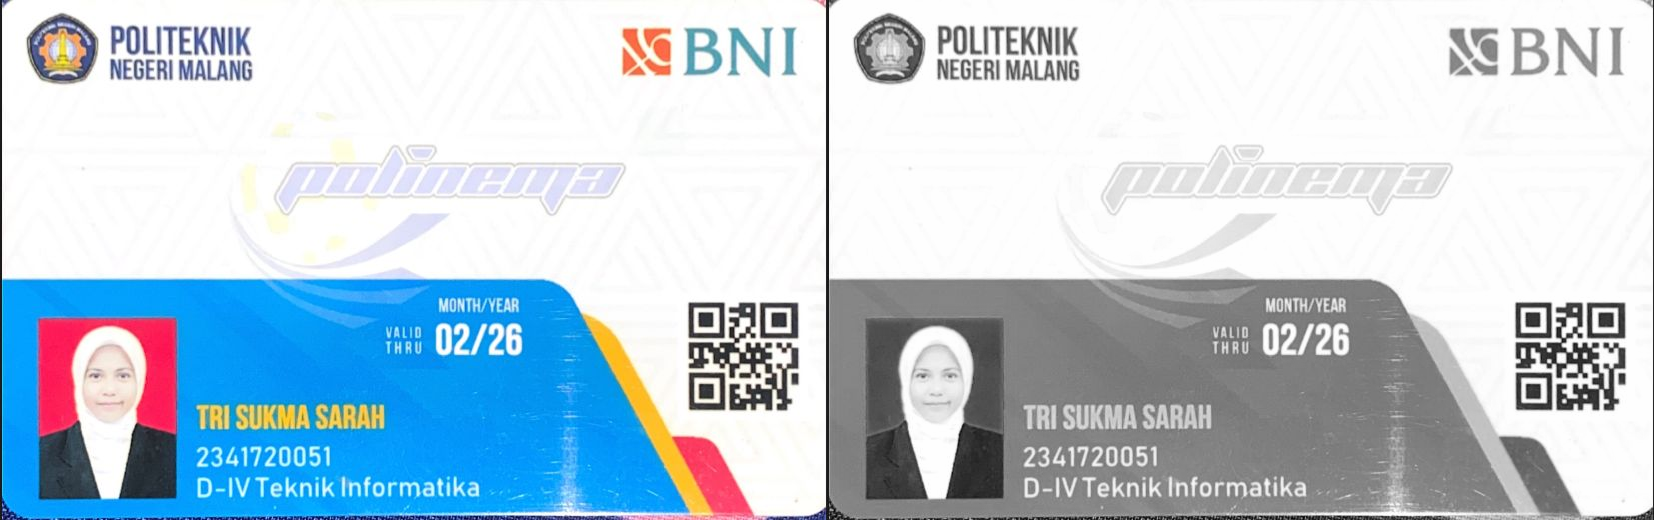

In [10]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print("Implementasi transformasi grayscale dengan metode averaging, lightness, dan luminance")
print("----------------------------------------------------------------------------------")

# Membaca gambar (secara default dalam format BGR)
original = cv.imread('/content/drive/MyDrive/PCVK/ktm.jpg')

# Periksa apakah gambar berhasil dimuat
if original is None:
    print("Error: Tidak dapat memuat gambar. Pastikan path file benar.")
else:
    # Mengambil kanal BGR dari gambar
    b, g, r = cv.split(original)

    # Grayscale Averaging
    # Formula: (R + G + B) / 3
    grayscale_avg = (r.astype(np.float64) + g.astype(np.float64) + b.astype(np.float64)) / 3
    grayscale_avg = np.uint8(grayscale_avg)

    # Grayscale Lightness
    # Formula: (max(R, G, B) + min(R, G, B)) / 2
    max_val = np.maximum.reduce([r, g, b])
    min_val = np.minimum.reduce([r, g, b])
    grayscale_lightness = (max_val.astype(np.float64) + min_val.astype(np.float64)) / 2
    grayscale_lightness = np.uint8(grayscale_lightness)

    # Grayscale Luminance
    # Formula: 0.21 * R + 0.72 * G + 0.07 * B
    grayscale_luminance = 0.21 * r.astype(np.float64) + 0.72 * g.astype(np.float64) + 0.07 * b.astype(np.float64)
    grayscale_luminance = np.uint8(grayscale_luminance)

    # Menggabungkan gambar asli dan hasil transformasi
    # Menggunakan cv.hconcat untuk menggabungkan gambar secara horizontal
    # Mengubah gambar grayscale menjadi 3 kanal untuk tampilan yang konsisten jika perlu
    # Namun, cv2_imshow bisa menampilkan gambar 1 kanal dengan baik
    final_frame_avg = cv.hconcat([original, cv.cvtColor(grayscale_avg, cv.COLOR_GRAY2BGR)])
    final_frame_lightness = cv.hconcat([original, cv.cvtColor(grayscale_lightness, cv.COLOR_GRAY2BGR)])
    final_frame_luminance = cv.hconcat([original, cv.cvtColor(grayscale_luminance, cv.COLOR_GRAY2BGR)])

    # Menampilkan hasil
    print("Averaging Method:")
    cv2_imshow(final_frame_avg)
    print("\nLightness Method:")
    cv2_imshow(final_frame_lightness)
    print("\nLuminance Method:")
    cv2_imshow(final_frame_luminance)

    cv.waitKey(0)
    cv.destroyAllWindows()

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna biru menjadi grayscale seperti pada contoh berikut:

Menampilkan warna tertentu (biru) dan mengubah warna lain menjadi grayscale
-------------------------------------------------------------------------


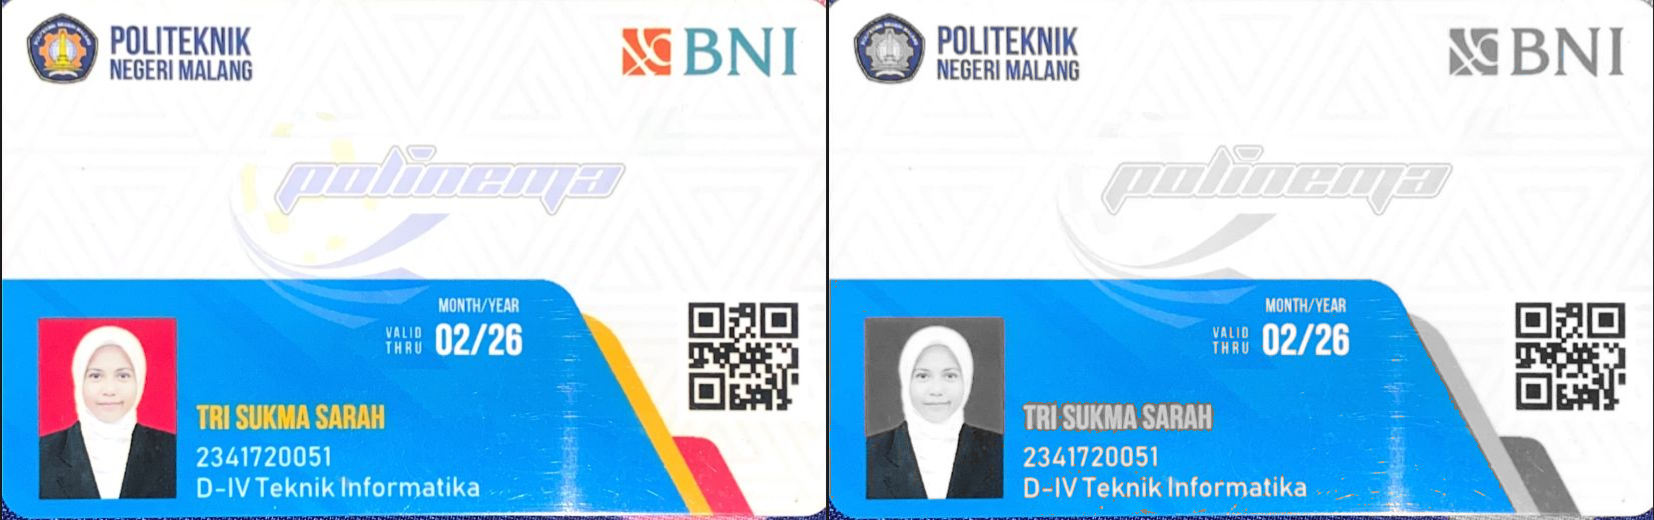

In [11]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print("Menampilkan warna tertentu (biru) dan mengubah warna lain menjadi grayscale")
print("-------------------------------------------------------------------------")

# Membaca gambar
original = cv.imread('/content/drive/MyDrive/PCVK/ktm.jpg')

if original is None:
    print("Error: Gambar tidak ditemukan atau path salah.")
else:
    # Mengambil dimensi gambar
    rows, cols, _ = original.shape

    # Mengubah gambar ke format HSV untuk segmentasi warna yang lebih baik
    hsv = cv.cvtColor(original, cv.COLOR_BGR2HSV)

    # Menentukan rentang warna biru dalam HSV
    # Rentang ini bisa disesuaikan tergantung nuansa warna birunya
    lower_blue = np.array([100, 50, 50])
    upper_blue = np.array([130, 255, 255])

    # Membuat mask untuk warna biru
    mask_blue = cv.inRange(hsv, lower_blue, upper_blue)

    # Membuat gambar grayscale dari gambar asli
    gray = cv.cvtColor(original, cv.COLOR_BGR2GRAY)
    # Mengubah gambar grayscale menjadi 3 kanal agar bisa digabungkan dengan gambar berwarna
    gray_3_channel = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

    # Menggabungkan gambar berwarna dan grayscale
    # Bagian berwarna (biru) diambil dari gambar asli
    # Bagian lain diambil dari gambar grayscale
    output = np.zeros_like(original)

    for i in range(rows):
        for j in range(cols):
            # Jika piksel berada dalam rentang biru (mask_blue > 0)
            if mask_blue[i, j] > 0:
                output[i, j] = original[i, j]
            # Jika tidak, gunakan piksel grayscale
            else:
                output[i, j] = gray_3_channel[i, j]

    # Menggabungkan gambar asli dan gambar hasil
    final_frame = cv.hconcat([original, output])

    # Menampilkan hasil
    cv2_imshow(final_frame)
    cv.waitKey(0)
    cv.destroyAllWindows()